# SUPERVISED LEARNING 
## Decision Trees
 Decision trees are widely used models for classification and regression tasks. Essen‐
 tially, they learn a hierarchy of if/else questions, leading to a decision

In [1]:

pip install mglearn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [3]:
!pip install graphviz


In [4]:
!python -m pip install --upgrade pip


In [5]:
import sys
print(sys.executable)


C:\Users\nsaba\AppData\Local\Programs\Python\Python312\python.exe


In [6]:
!C:\Users\nsaba\AppData\Local\Programs\Python\Python312\python.exe -m pip install graphviz


In [7]:
import graphviz
print("Graphviz is working!")


Graphviz is working!


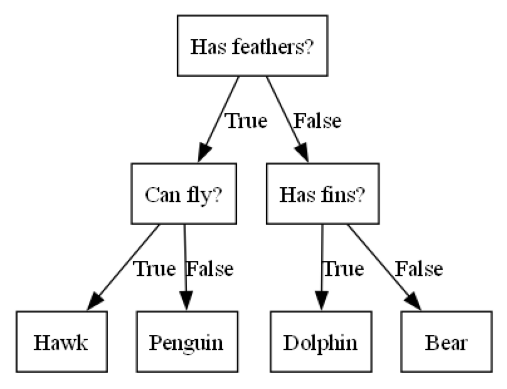

In [8]:
import mglearn
mglearn.plots.plot_animal_tree()


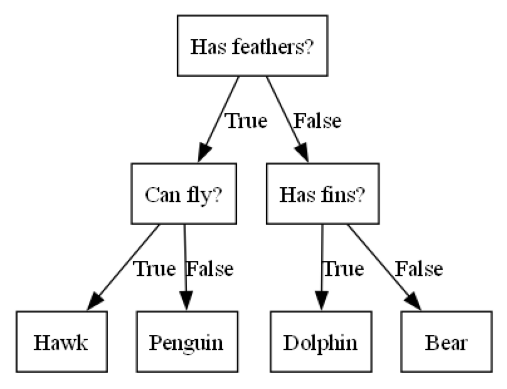

In [9]:
mglearn.plots.plot_animal_tree()

# Controlling complexity of decision trees


In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [13]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951


# Analyzing decision trees

In [14]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)

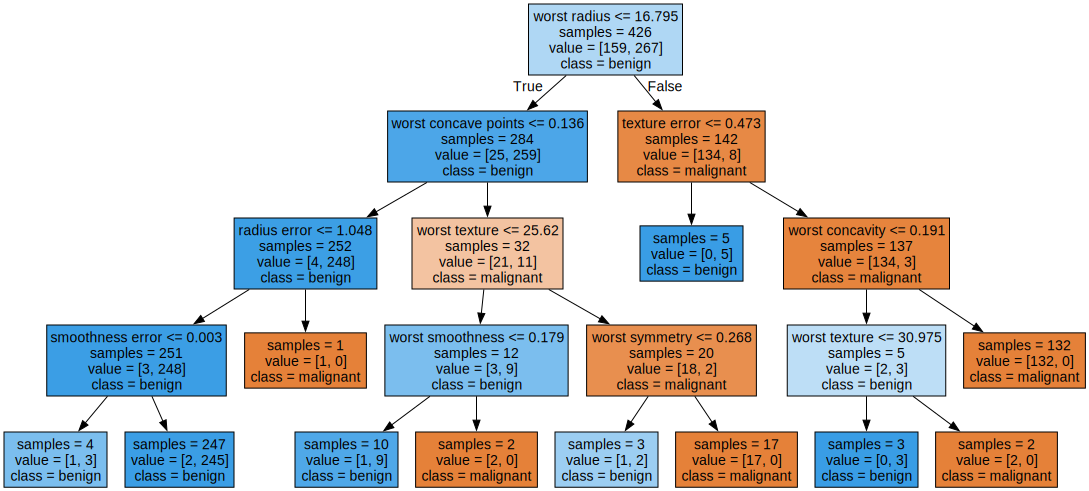

In [15]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

# Feature importance in trees

In [16]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


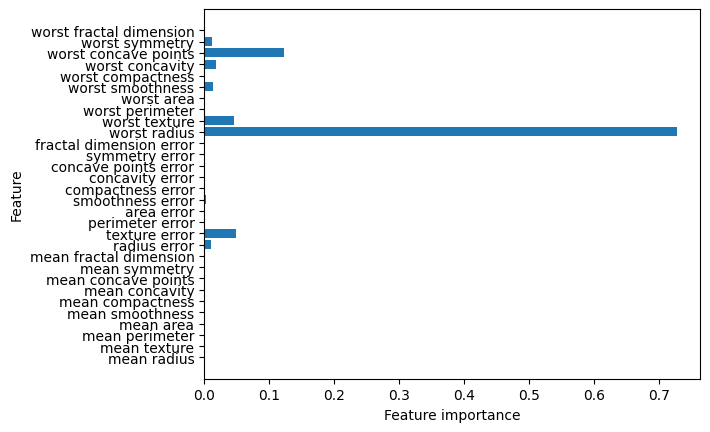

In [17]:
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

##### A two-dimensional dataset in which the feature on the y-axis has a nonmonotonous relationship with the class label, and the decision boundaries found by a decision tree

Feature importances: [0. 1.]


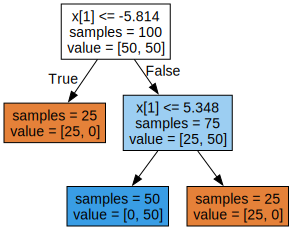

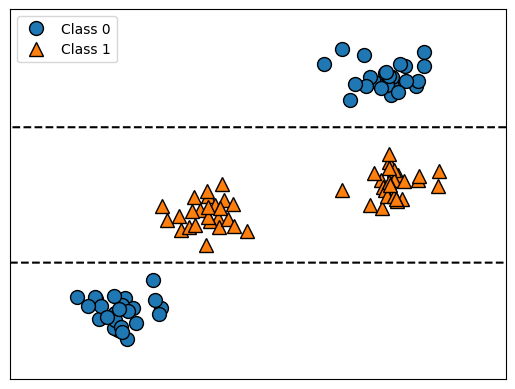

In [18]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)


Text(0, 0.5, 'Price in $/Mbyte')

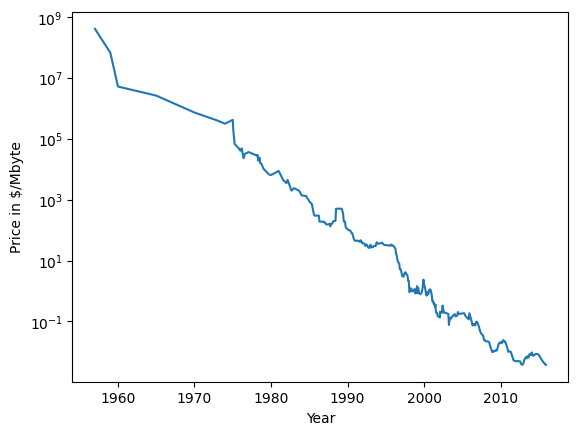

In [23]:

import pandas as pd
ram_prices = pd.read_csv("ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

#### Historical development of the price of RAM, plotted on a log scale

## Comparison of predictions made by a linear model and predictions made by a regression tree on the RAM price data

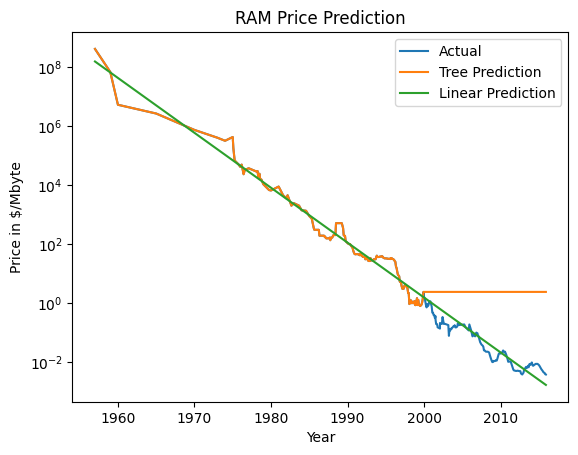

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date.to_numpy()[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date.to_numpy()[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

# Plotting
plt.semilogy(ram_prices.date, ram_prices.price, label="Actual")
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear Prediction")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.title("RAM Price Prediction")
plt.show()


# Building random forests

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

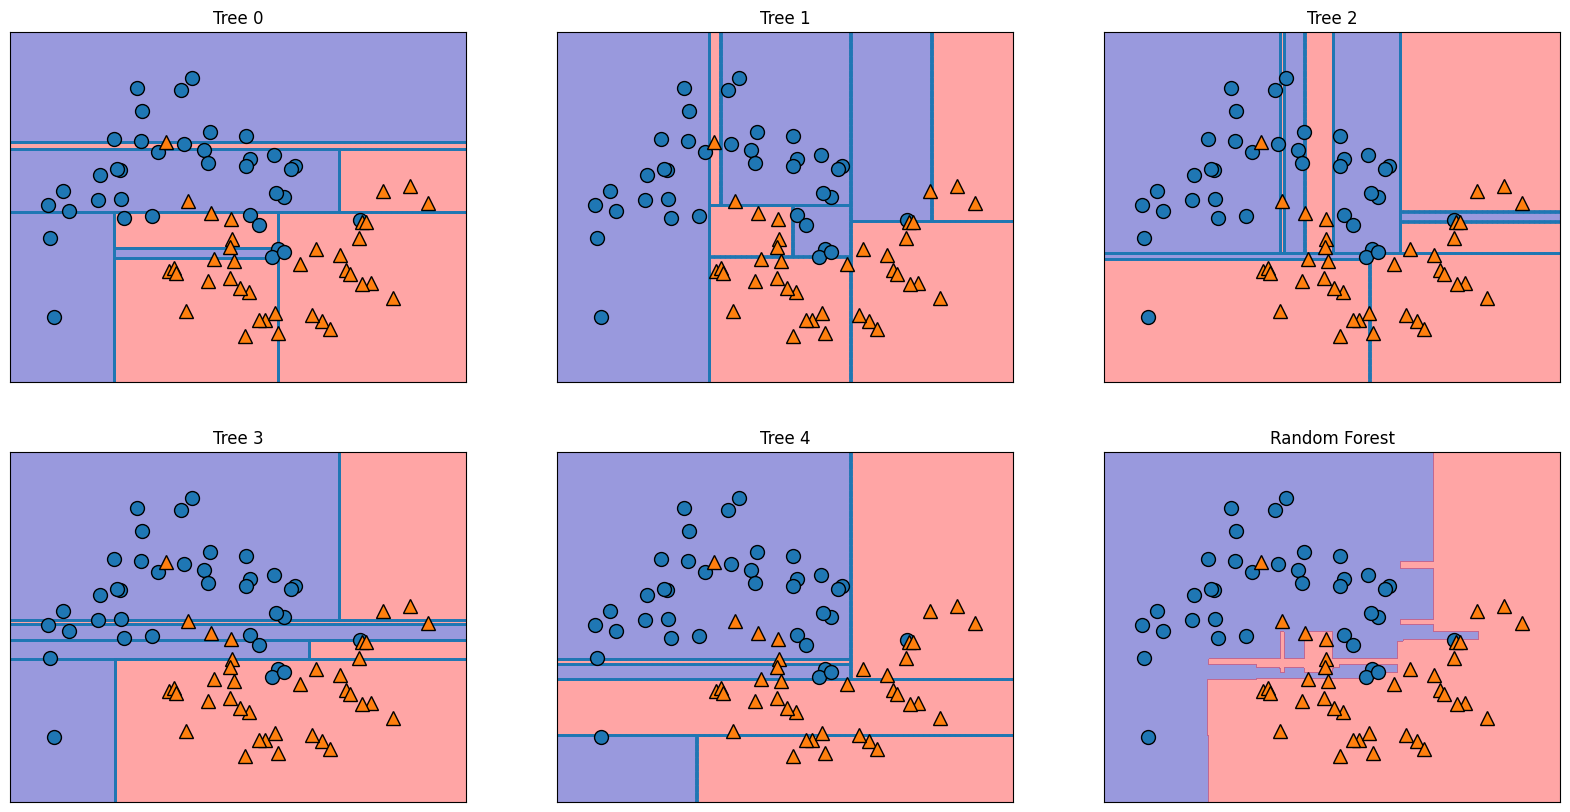

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
 ax.set_title("Tree {}".format(i))
 mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
 alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

### Decision boundaries found by five randomized decision trees and the decision boundary obtained by averaging their predicted probabilities


In [28]:

X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


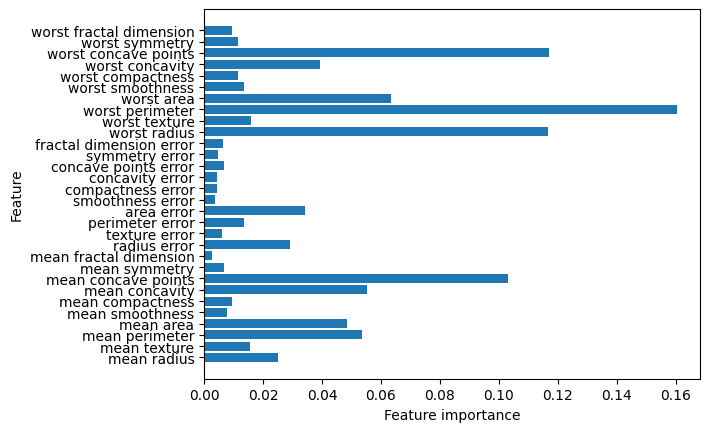

In [29]:
plot_feature_importances_cancer(forest)

# Gradient boosted regression trees (gradient boosting machines)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [33]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [34]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


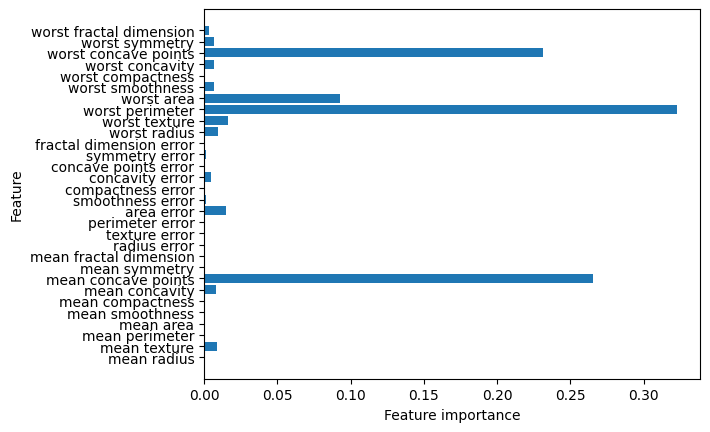

In [35]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

#### Feature importances computed from a gradient boosting classifier that was fit to the Breast Cancer dataset

# Kernelized Support Vector Machines

Text(0, 0.5, 'Feature 1')

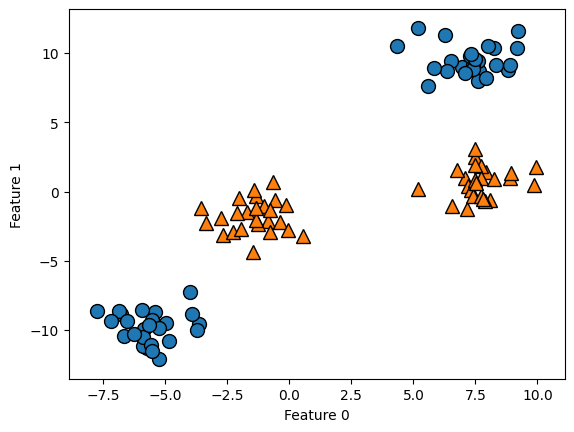

In [39]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

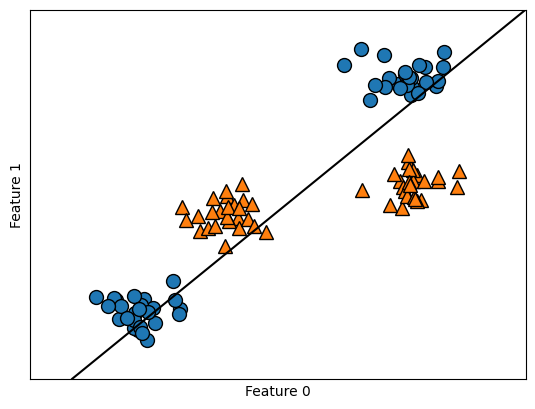

In [40]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

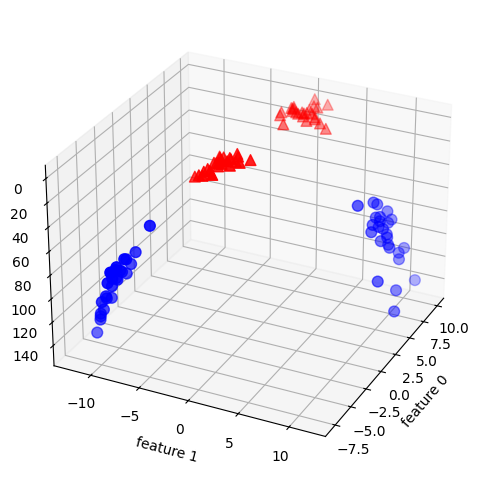

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import mglearn

# Add squared feature
X_new = np.hstack([X, X[:, 1:] ** 2])

# Create figure and 3D subplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-152, azim=-26)

# Mask for class 0
mask = y == 0

# Scatter plots for each class
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)

# Axis labels
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")

# Show the plot
plt.show()


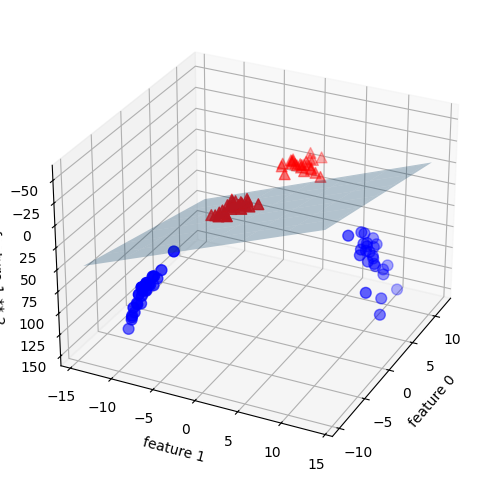

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np

# Fit the model
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Create 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-152, azim=-26)

# Create grid for decision surface
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)

# Compute decision boundary (ZZ) based on the hyperplane equation
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

# Plot surface
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# Mask for class 0 and 1
mask = y == 0

# Plot the points
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)

# Set labels
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")

# Show plot
plt.show()


Text(0, 0.5, 'Feature 1')

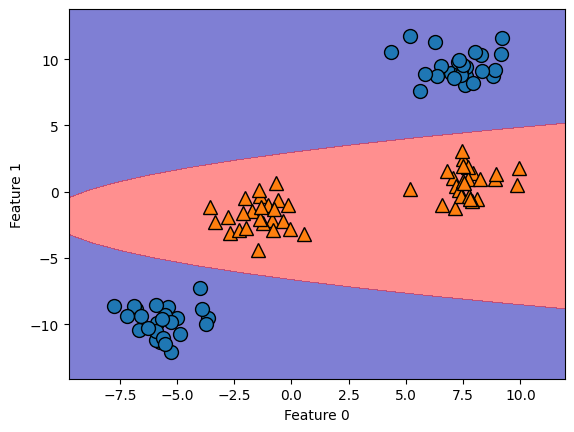

In [47]:

ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
 cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Understanding SVMs

Text(0, 0.5, 'Feature 1')

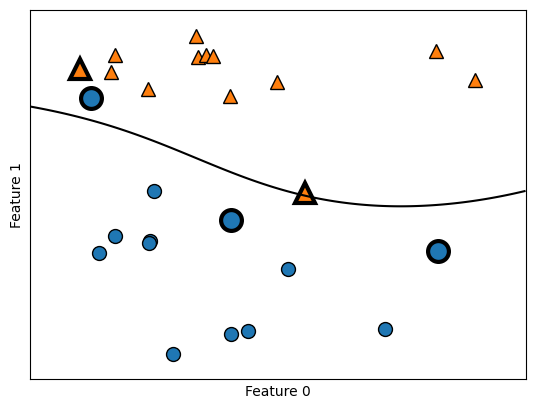

In [48]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


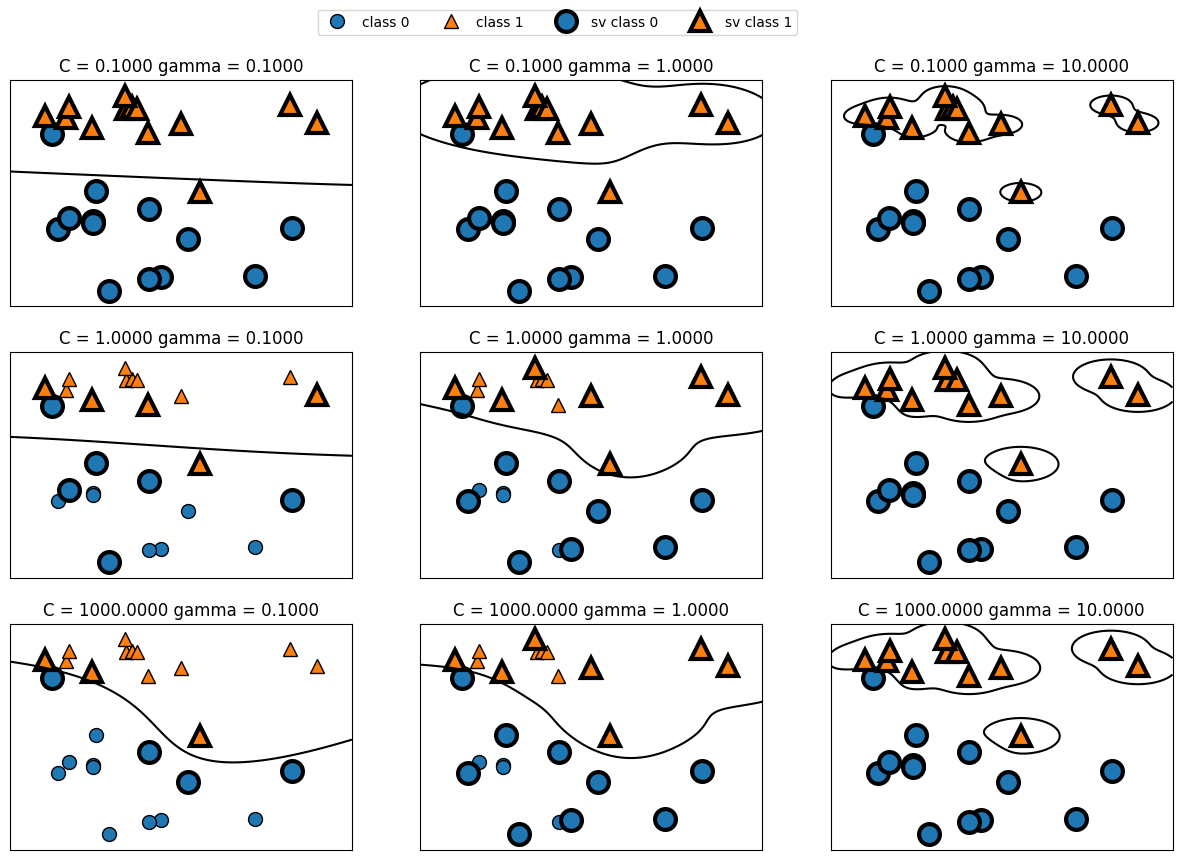

In [50]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax_row, C in zip(axes, [-1, 0, 3]):
    for ax, gamma in zip(ax_row, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=ax)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

plt.show()


In [51]:
_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))


Accuracy on training set: 0.90
Accuracy on test set: 0.94


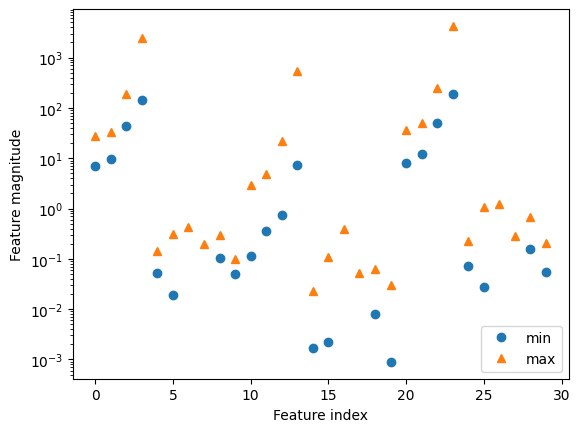

In [52]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [53]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [55]:
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [56]:

svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


# Neural Networks (Deep Learning)

## The neural network model

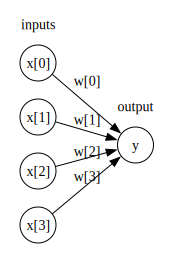

In [58]:
display(mglearn.plots.plot_logistic_regression_graph())

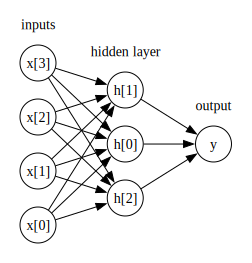

In [59]:
display(mglearn.plots.plot_single_hidden_layer_graph())


Text(0, 0.5, 'relu(x), tanh(x)')

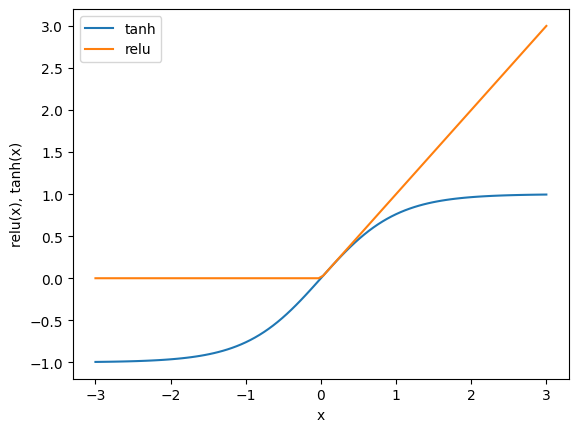

In [60]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

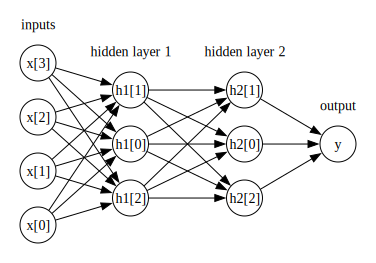

In [61]:
mglearn.plots.plot_two_hidden_layer_graph()

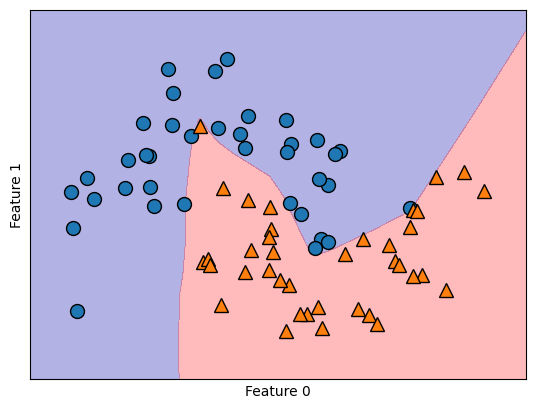

In [65]:


# Generate synthetic data
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Create and train the MLP model
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

# Plot the decision boundary
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


C:\Users\nsaba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


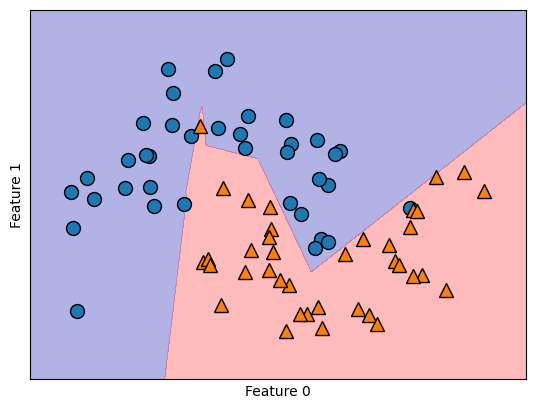

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

# Create the dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Corrected MLPClassifier with solver and hidden_layer_sizes
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)

# Plotting
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


C:\Users\nsaba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\nsaba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


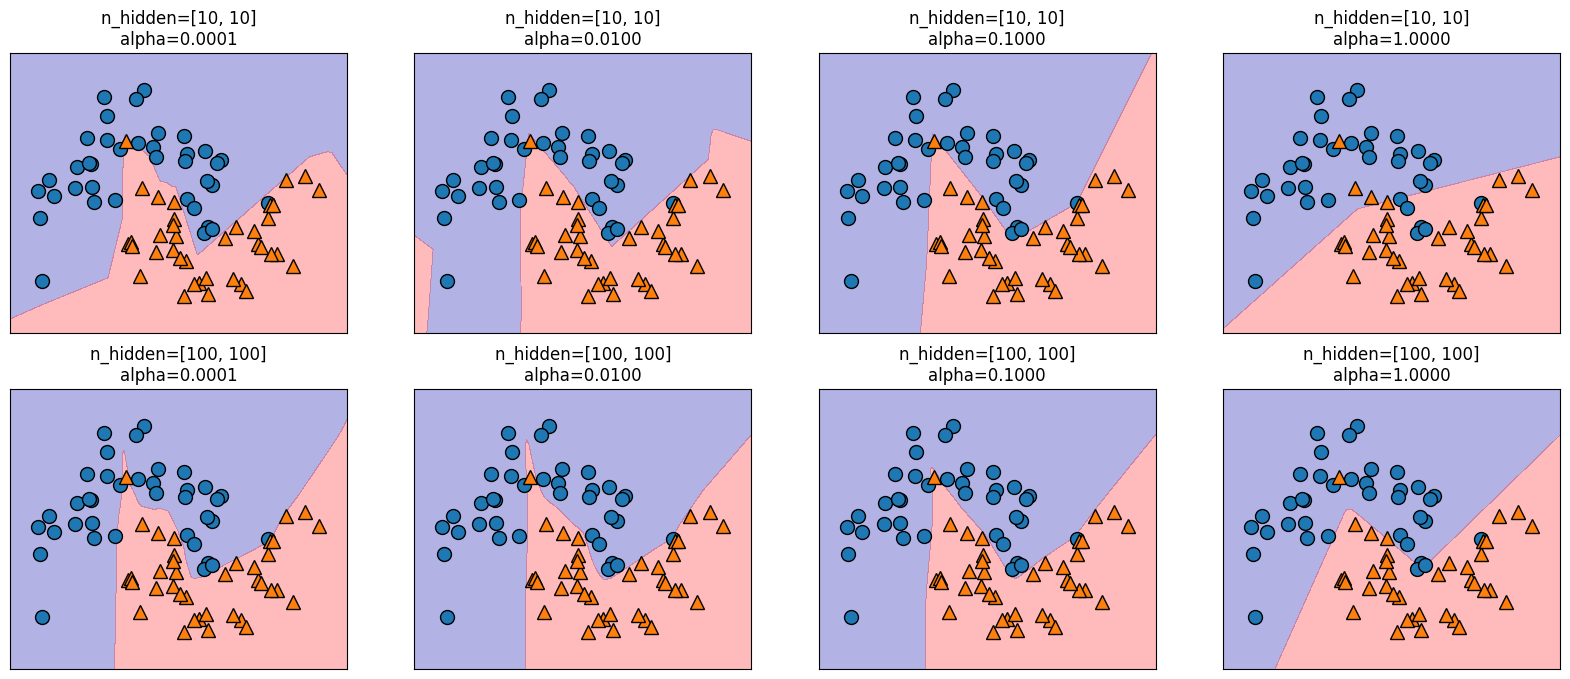

In [69]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn

# Generate dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Loop through different configurations
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        # Corrected: use solver instead of algorithm
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha))

plt.show()


In [70]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [71]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))


Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [74]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [75]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [76]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.972


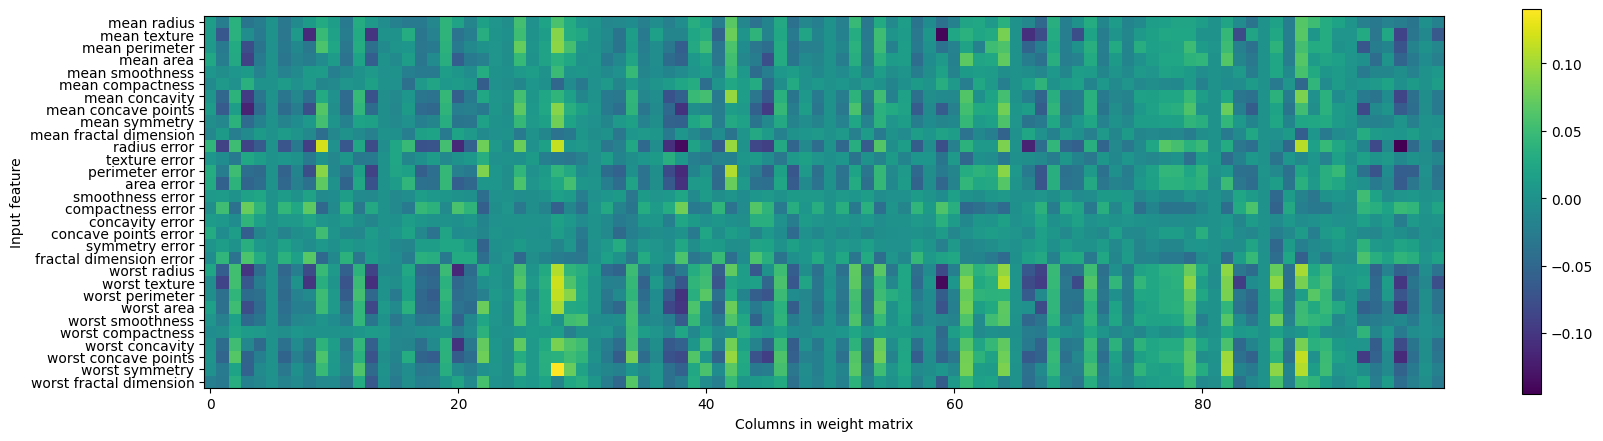

In [77]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
